In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import random
from scipy.stats import ks_2samp
sns.set(color_codes=True)


In [2]:
#define paths

data_dir = '/analysis/shikhar/abcd_npc/img_dt/' # or /data/Ritter/abcd_np/
trainy_filename = 'train/train_y.csv'
valy_filename = 'val/val_y.csv'
testy_filename ='test/test_y.csv'
trainx_filename = 'train/volumetrix_data_train.csv'
valx_filename = 'val/volumetrix_data_val.csv'
testx_filename = 'test/volumetrix_data_test.csv'

In [3]:
#loading datasets

trainy= pd.read_csv(data_dir+trainy_filename, index_col=False)
valy= pd.read_csv(data_dir+valy_filename, index_col=False)
testy= pd.read_csv(data_dir+testy_filename, index_col=False)
trainx =  pd.read_csv(data_dir+trainx_filename, index_col=False)
valx =  pd.read_csv(data_dir+valx_filename, index_col=False)
testx =  pd.read_csv(data_dir+testx_filename, index_col=False)

all_data = trainx.append(valx).append(testx).copy()
trainvalx = trainx.append(valx)
all_data['sex_bin'] = np.where(all_data['GENDER']=='F', 1, 0)
all_data = all_data.drop(['BTSV01_ID','DATASET_ID','GENDER','SRC_SUBJECT_ID','INTERVIEW_DATE'],\
                         axis=1).copy() ## removing irrelevant columns
allY = pd.merge(all_data[['SUBJECTKEY','INTERVIEW_AGE','sex_bin','STUDY_COHORT_NAME']], \
                             trainy.append(valy), left_on='SUBJECTKEY', right_on='subject')

In [4]:
allY

,SUBJECTKEY,INTERVIEW_AGE,sex_bin,STUDY_COHORT_NAME,subject,residual_fluid_intelligence_score
0,NDAR_INV47FFMT85,126,1,ABCD NP Challenge 2019 Training Set,NDAR_INV47FFMT85,18.617968
1,NDAR_INVGP0KJLU3,124,0,ABCD NP Challenge 2019 Training Set,NDAR_INVGP0KJLU3,3.453365
2,NDAR_INVPMHGZU3M,120,1,ABCD NP Challenge 2019 Training Set,NDAR_INVPMHGZU3M,0.632251
3,NDAR_INVRPYKZRFL,117,1,ABCD NP Challenge 2019 Training Set,NDAR_INVRPYKZRFL,1.488461
4,NDAR_INVB8UX2D6Y,120,1,ABCD NP Challenge 2019 Training Set,NDAR_INVB8UX2D6Y,1.774360
5,NDAR_INVXHD5E4MN,109,0,ABCD NP Challenge 2019 Training Set,NDAR_INVXHD5E4MN,6.180170
6,NDAR_INVLGBWLRM4,115,1,ABCD NP Challenge 2019 Training Set,NDAR_INVLGBWLRM4,11.878714
7,NDAR_INVUCGJ1U8F,120,1,ABCD NP Challenge 2019 Training Set,NDAR_INVUCGJ1U8F,1.796625
8,NDAR_INVAVR6TURT,114,0,ABCD NP Challenge 2019 Training Set,NDAR_INVAVR6TURT,2.199330
9,NDAR_INV930295U4,117,0,ABCD NP Challenge 2019 Training Set,NDAR_INV930295U4,6.921028


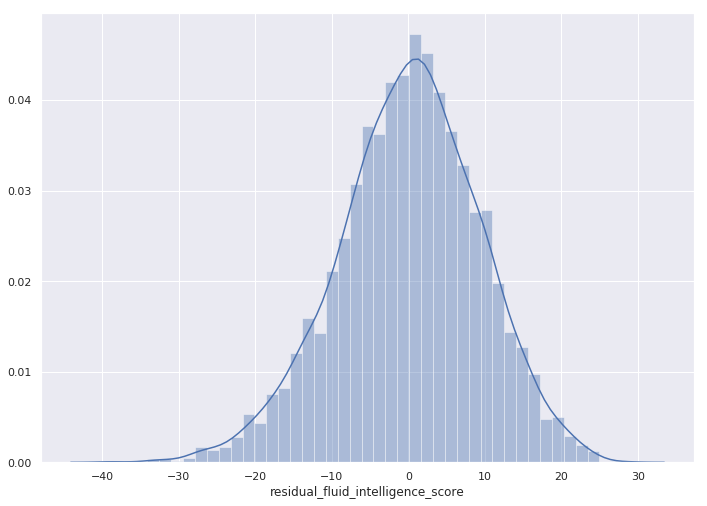

In [5]:
# target value distribution
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(trainy['residual_fluid_intelligence_score']);

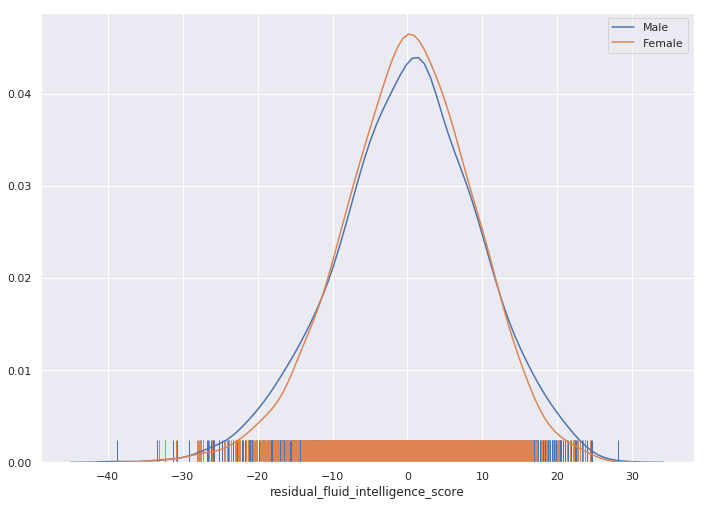

In [6]:
## Male and Female < The fluid_IQ scores are already normalized on gender. Plot shows fluctuation amongst gender

sns.distplot(allY[allY.sex_bin==0]['residual_fluid_intelligence_score'], hist=False, rug=True, label="Male")
sns.distplot(allY[allY.sex_bin==1]['residual_fluid_intelligence_score'], hist=False, rug=True, label="Female")

----
### Outlier Analysis

In [7]:
# KS significance test to check column's have same distribution in test and train

col_sign = []
col_high = []
col_no = []
col_all = []

for column in all_data[all_data.columns.difference(['SUBJECTKEY', 'INTERVIEW_AGE','STUDY_COHORT_NAME','sex_bin'])]:
    col_all.extend([column])
    a = ks_2samp(trainvalx[column],testx[column])
    b = round((1-a.pvalue),3)
    diff_type = ['Not','Highly','SIGNIFICANTLY']
    if b>0.95:
        diff = diff_type[2]
        col_sign.extend([column])
    elif b>0.90:
        diff = diff_type[1]
        col_high.extend([column])
    else:
        diff = diff_type[0]
        col_no.extend([column])
    print("Column: ",column," > Test and train data are ",diff," different.")

Column:  SRI24AMYGDALALGM  > Test and train data are  Not  different.
Column:  SRI24AMYGDALARGM  > Test and train data are  SIGNIFICANTLY  different.
Column:  SRI24ANGULARLGM  > Test and train data are  SIGNIFICANTLY  different.
Column:  SRI24ANGULARRGM  > Test and train data are  SIGNIFICANTLY  different.
Column:  SRI24CALCARINELGM  > Test and train data are  Highly  different.
Column:  SRI24CALCARINERGM  > Test and train data are  Not  different.
Column:  SRI24CAUDATELGM  > Test and train data are  SIGNIFICANTLY  different.
Column:  SRI24CAUDATERGM  > Test and train data are  SIGNIFICANTLY  different.
Column:  SRI24CBLMHEMIWHTLWM  > Test and train data are  Not  different.
Column:  SRI24CBLMHEMIWHTRWM  > Test and train data are  Not  different.
Column:  SRI24CEREBELUM10LVOLUME  > Test and train data are  Not  different.
Column:  SRI24CEREBELUM10RVOLUME  > Test and train data are  SIGNIFICANTLY  different.
Column:  SRI24CEREBELUM3LVOLUME  > Test and train data are  Not  different.
Col

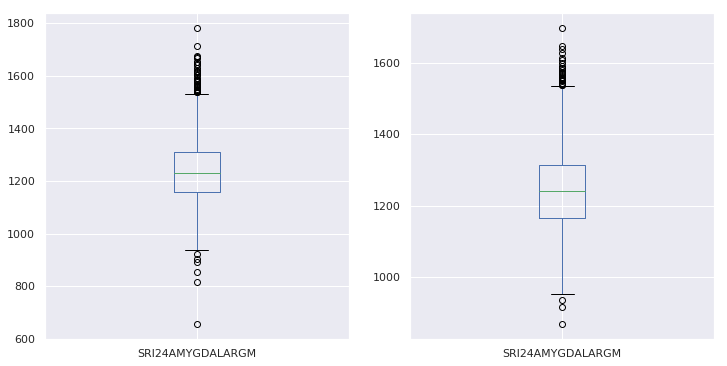

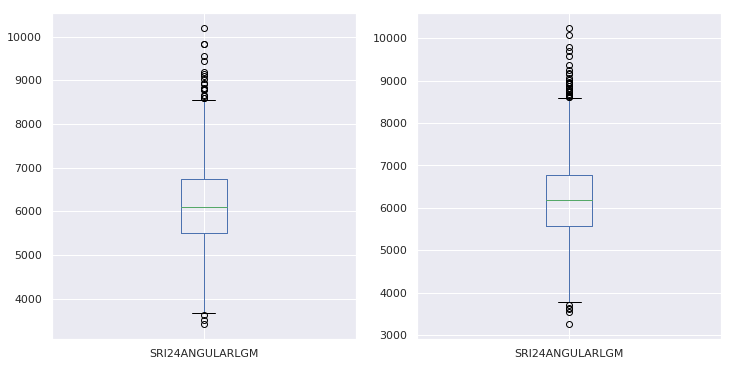

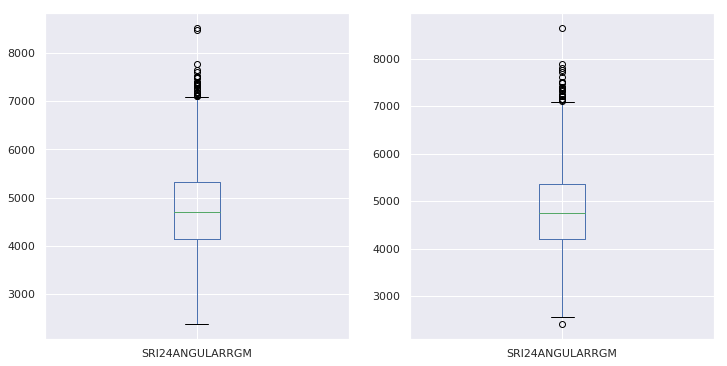

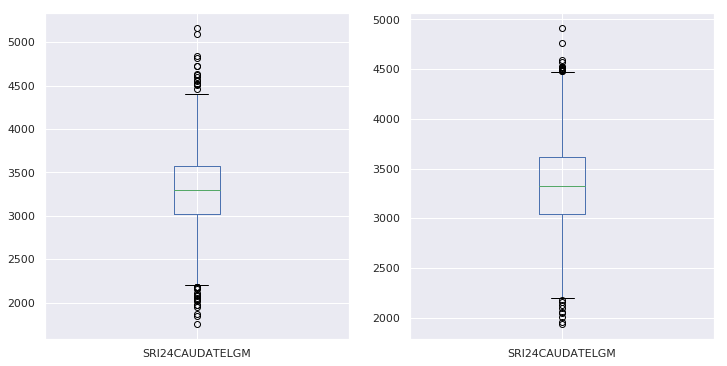

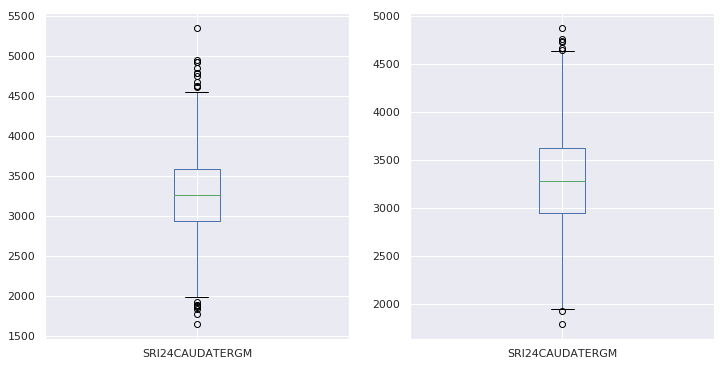

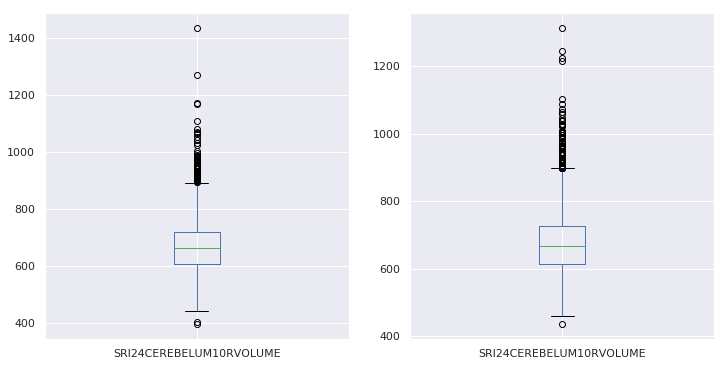

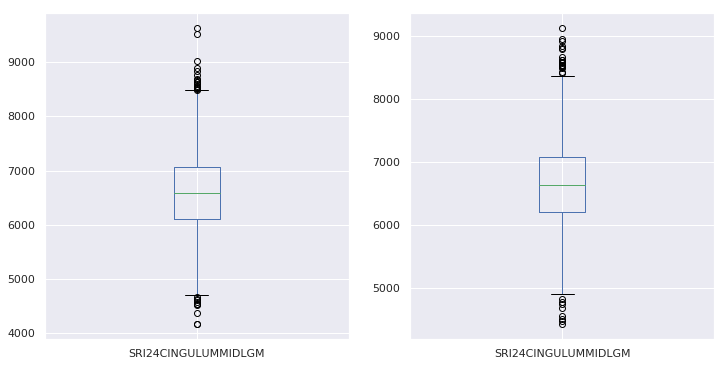

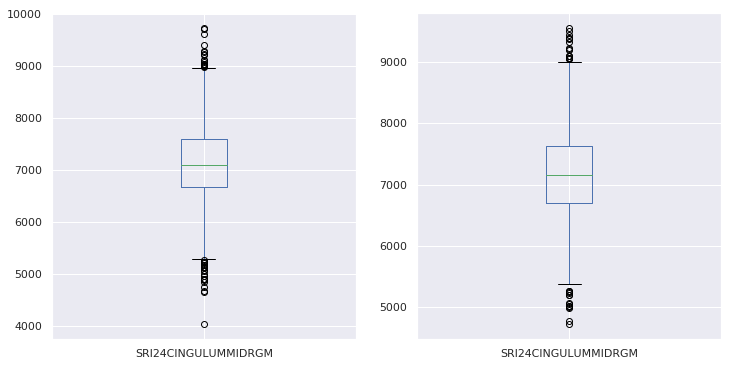

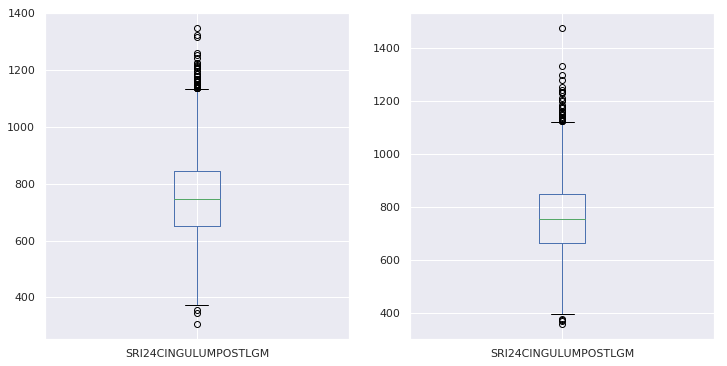

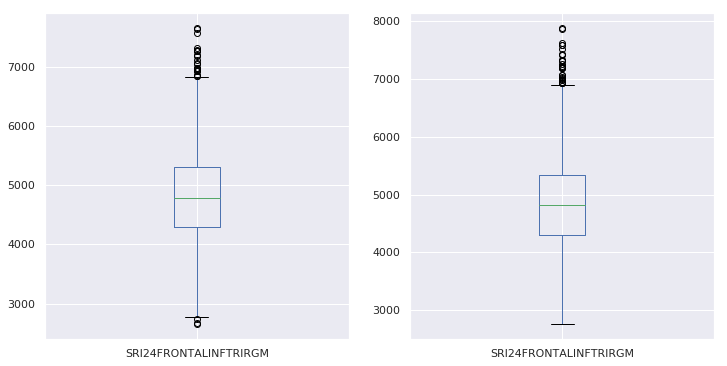

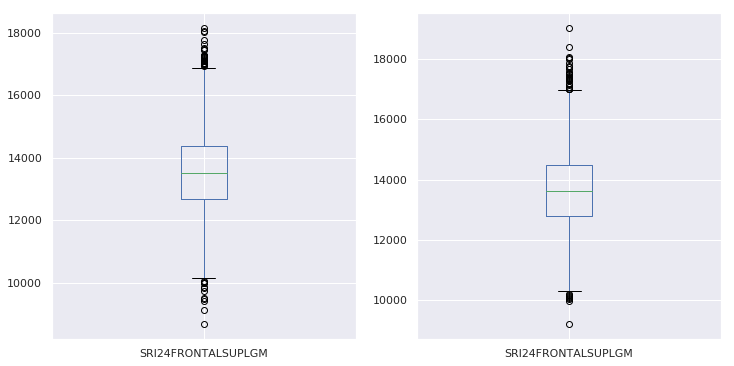

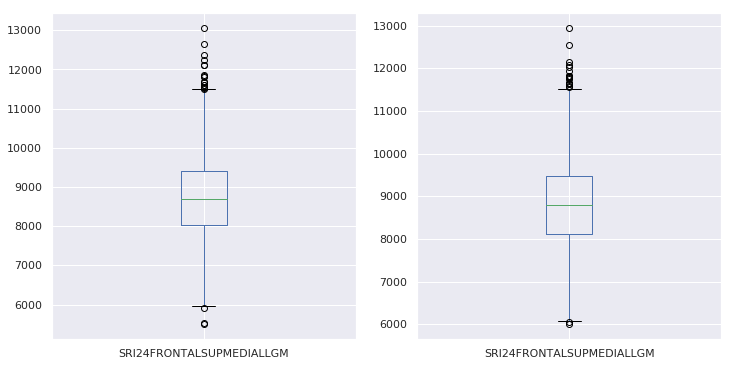

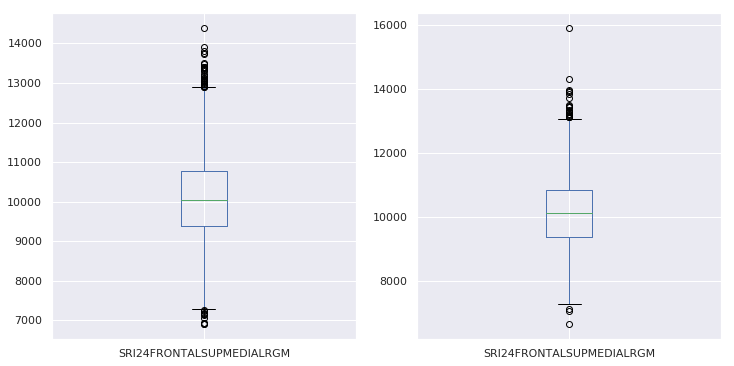

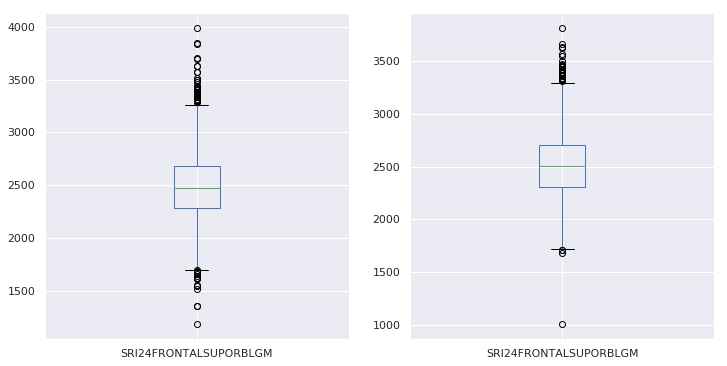

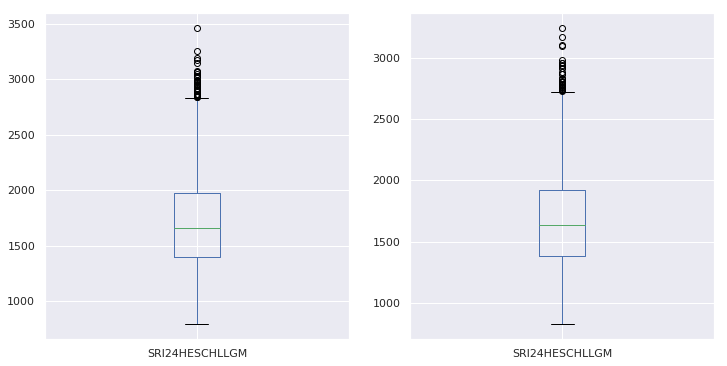

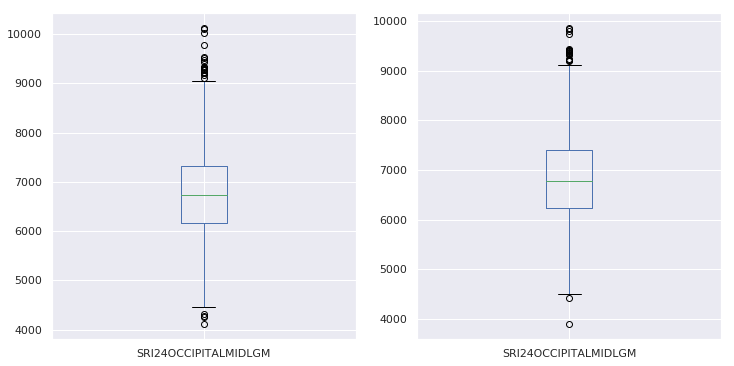

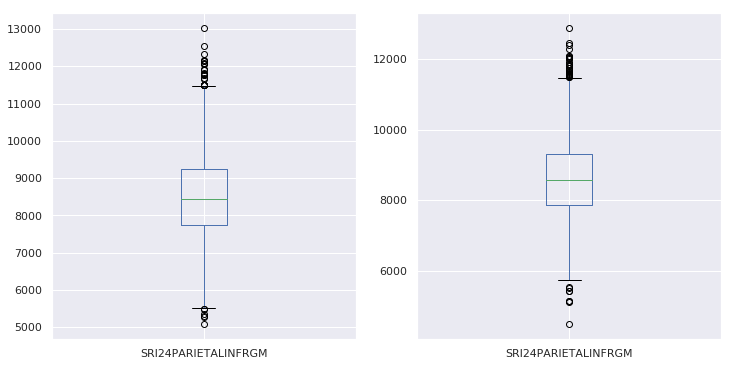

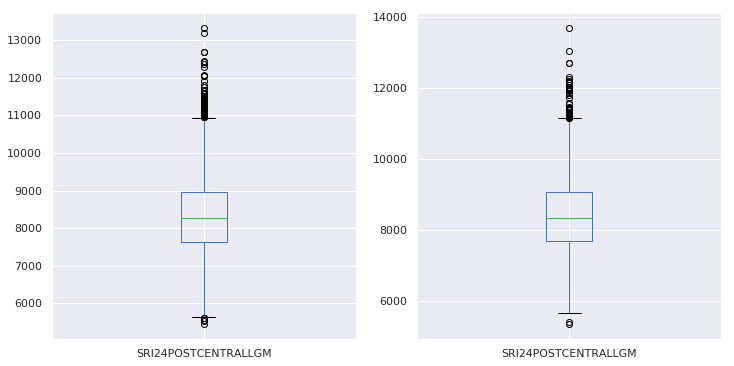

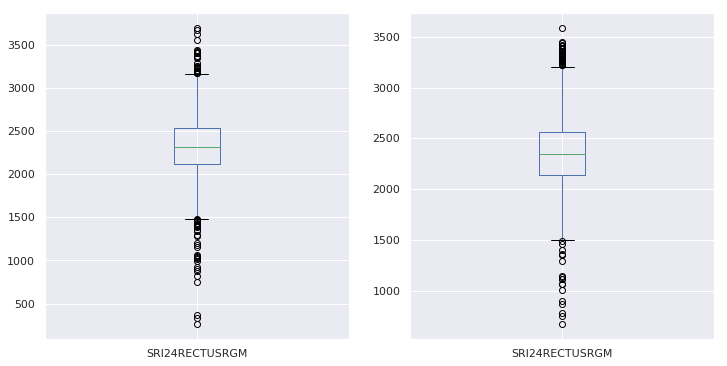

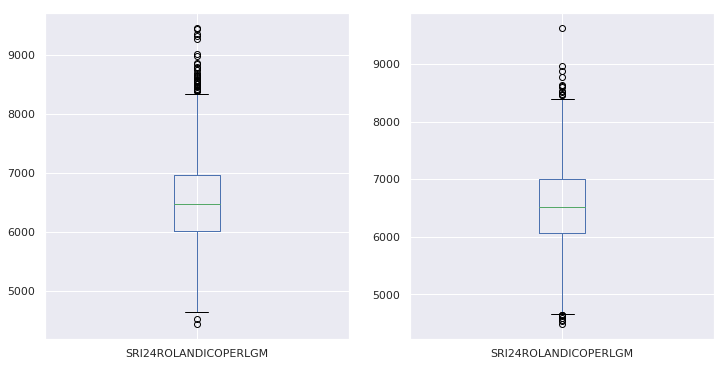

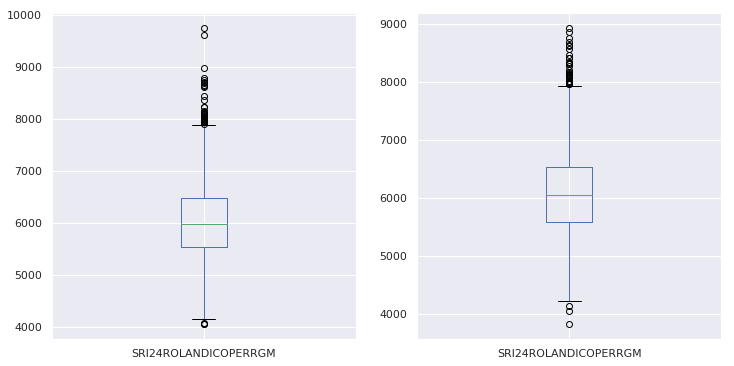

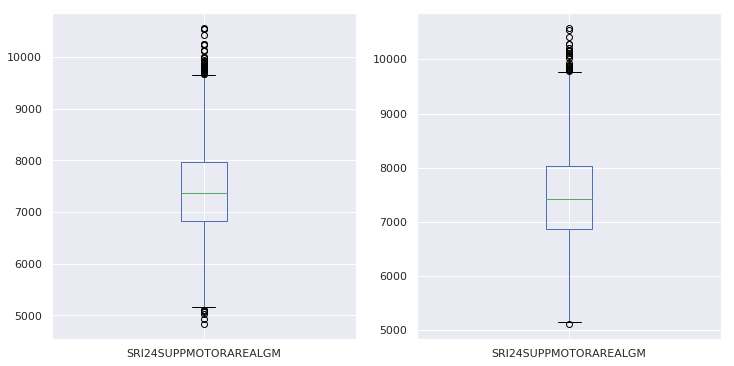

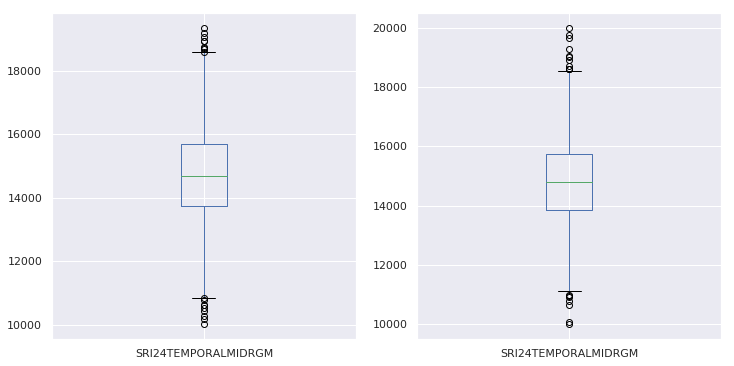

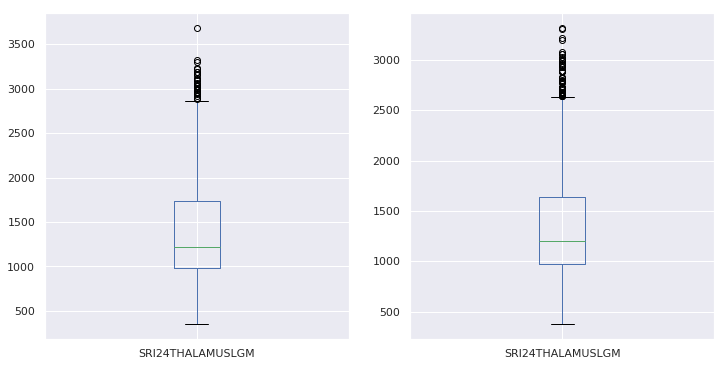

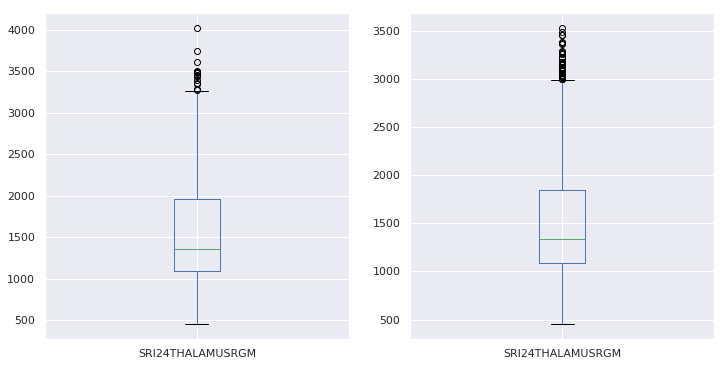

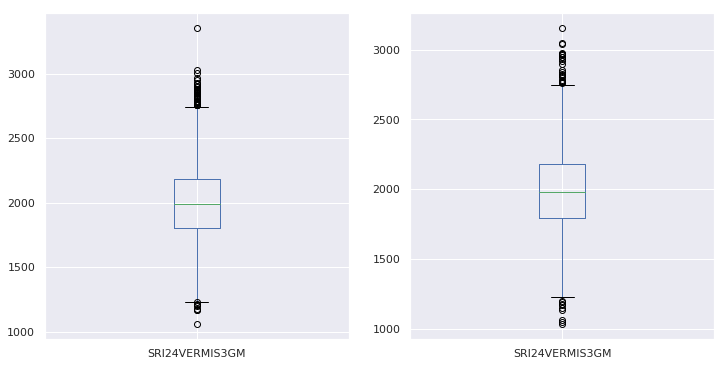

In [8]:
### checking the distribution in test and train for columns which has significant differences (from above)

for column in col_sign:
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    trainvalx.boxplot([column],ax=axes[0])
    testx.boxplot([column],ax=axes[1])
    plt.show()
    plt.close()

In [9]:
### checking extreme values in test and train for columns which has significant differences (from above)

for column in col_sign:
    a=[]
    b=[]
    a.extend([min(trainvalx[column]),trainvalx[column].quantile(0.05),trainvalx[column].quantile(0.5),\
             trainvalx[column].quantile(0.95),max(trainvalx[column])])
    b.extend([min(testx[column]),testx[column].quantile(0.05),testx[column].quantile(0.5),\
             testx[column].quantile(0.95),max(testx[column])])
    a = [ '%.2f' % elem for elem in a ]
    b = [ '%.2f' % elem for elem in b ]
    print(column," train 0,0.05,0.5,0.95,1 values are:",str(a))
    print(column," test 0,0.05,0.5,0.95,1 values are:",str(b))
    

SRI24AMYGDALARGM  train 0,0.05,0.5,0.95,1 values are: ['653.70', '1055.01', '1230.24', '1425.77', '1782.51']
SRI24AMYGDALARGM  test 0,0.05,0.5,0.95,1 values are: ['867.90', '1064.22', '1240.35', '1423.18', '1697.87']
SRI24ANGULARLGM  train 0,0.05,0.5,0.95,1 values are: ['3408.53', '4724.31', '6104.85', '7678.77', '10200.20']
SRI24ANGULARLGM  test 0,0.05,0.5,0.95,1 values are: ['3246.80', '4774.23', '6186.48', '7749.43', '10246.20']
SRI24ANGULARRGM  train 0,0.05,0.5,0.95,1 values are: ['2366.17', '3448.51', '4706.21', '6276.62', '8523.00']
SRI24ANGULARRGM  test 0,0.05,0.5,0.95,1 values are: ['2409.00', '3481.08', '4759.22', '6281.51', '8649.76']
SRI24CAUDATELGM  train 0,0.05,0.5,0.95,1 values are: ['1751.93', '2610.27', '3296.89', '3959.48', '5162.38']
SRI24CAUDATELGM  test 0,0.05,0.5,0.95,1 values are: ['1930.51', '2645.71', '3328.74', '3987.50', '4914.79']
SRI24CAUDATERGM  train 0,0.05,0.5,0.95,1 values are: ['1643.93', '2483.65', '3262.92', '4037.02', '5349.97']
SRI24CAUDATERGM  test

#### ^^^ Extreme values in train vs test look not so different

In [10]:
## Male vs Female

# significance test to check column's have same distribution for each sex

sex_col_sign = []
sex_col_high = []
sex_col_no = []

for column in all_data[all_data.columns.difference(['SUBJECTKEY', 'INTERVIEW_AGE','STUDY_COHORT_NAME','sex_bin'])]:
    a = ks_2samp(all_data[all_data.sex_bin==0][column],all_data[all_data.sex_bin==0][column])
    b = round((1-a.pvalue),3)
    diff_type = ['Not','Highly','SIGNIFICANTLY']
    if b>0.95:
        diff = diff_type[2]
        sex_col_sign.extend([column])
    elif b>0.90:
        diff = diff_type[1]
        sex_col_high.extend([column])
    else:
        diff = diff_type[0]
        sex_col_no.extend([column])
    print("Column: ",column," > Test and train data are ",diff," different.")

Column:  SRI24AMYGDALALGM  > Test and train data are  Not  different.
Column:  SRI24AMYGDALARGM  > Test and train data are  Not  different.
Column:  SRI24ANGULARLGM  > Test and train data are  Not  different.
Column:  SRI24ANGULARRGM  > Test and train data are  Not  different.
Column:  SRI24CALCARINELGM  > Test and train data are  Not  different.
Column:  SRI24CALCARINERGM  > Test and train data are  Not  different.
Column:  SRI24CAUDATELGM  > Test and train data are  Not  different.
Column:  SRI24CAUDATERGM  > Test and train data are  Not  different.
Column:  SRI24CBLMHEMIWHTLWM  > Test and train data are  Not  different.
Column:  SRI24CBLMHEMIWHTRWM  > Test and train data are  Not  different.
Column:  SRI24CEREBELUM10LVOLUME  > Test and train data are  Not  different.
Column:  SRI24CEREBELUM10RVOLUME  > Test and train data are  Not  different.
Column:  SRI24CEREBELUM3LVOLUME  > Test and train data are  Not  different.
Column:  SRI24CEREBELUM3RVOLUME  > Test and train data are  Not  d

Column:  SRI24VTLSTHIRDVTLRCSF  > Test and train data are  Not  different.
Column:  SRI24WM400WM400LWM  > Test and train data are  Not  different.
Column:  SRI24WM400WM400RWM  > Test and train data are  Not  different.


In [11]:
print(sex_col_sign)
print(sex_col_high)

[]
[]


### ^^^ No difference in volumetrix data between genders
---

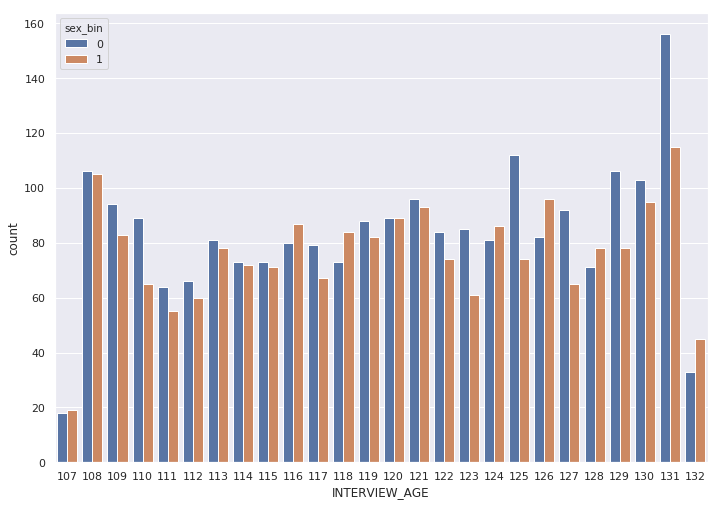

In [12]:
ax = sns.countplot(x="INTERVIEW_AGE", hue="sex_bin", data=allY) ## 0 is mail and 1 is Female


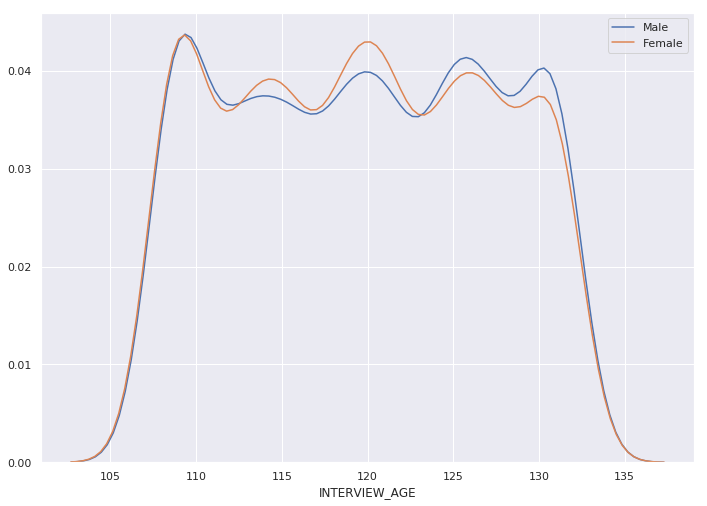

In [13]:
sns.distplot(all_data[all_data.sex_bin==0]["INTERVIEW_AGE"],hist=False,label='Male') 
sns.distplot(all_data[all_data.sex_bin==1]["INTERVIEW_AGE"],hist=False,label='Female') 

### ^^^ Almost the same

In [14]:
all_data['samplename'] = 'Val'
all_data.loc[all_data['STUDY_COHORT_NAME'] == 'ABCD NP Challenge 2019 Test Set','samplename'] = 'Test'
all_data.loc[all_data['STUDY_COHORT_NAME'] == 'ABCD NP Challenge 2019 Training Set','samplename'] = 'Train'
all_data.samplename.value_counts()

Train    3736
Test     3640
Val       415
Name: samplename, dtype: int64

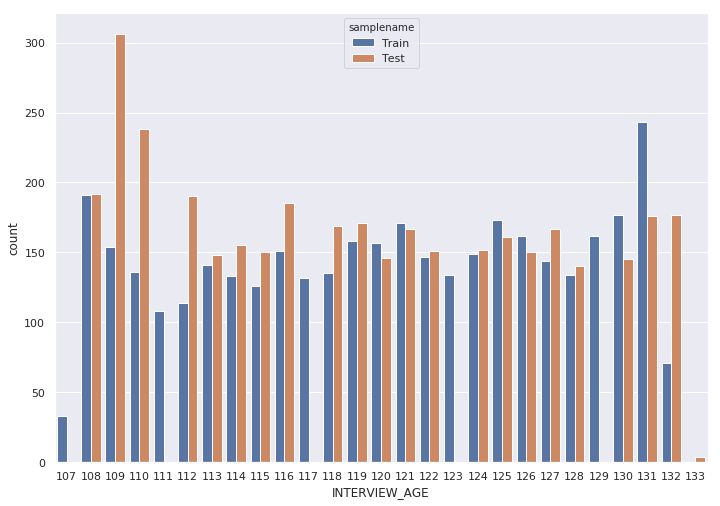

In [15]:
ax = sns.countplot(x="INTERVIEW_AGE", hue="samplename", data=all_data[all_data.samplename!='Val']) 

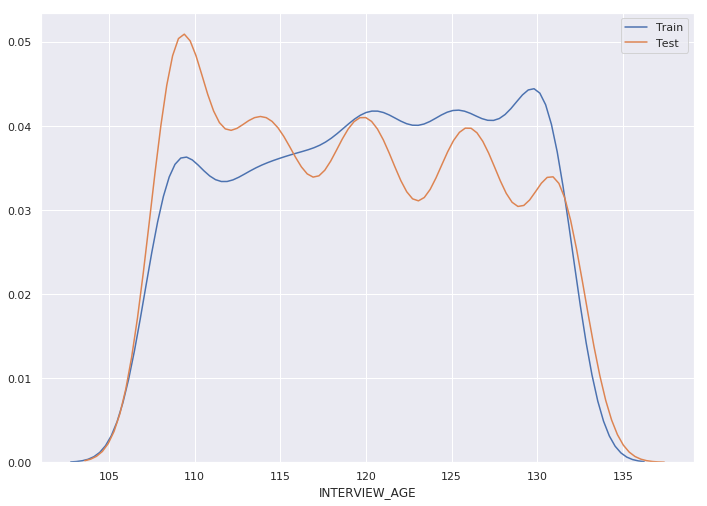

In [16]:
sns.distplot(all_data[all_data.samplename=='Train']["INTERVIEW_AGE"],hist=False,label='Train') 
sns.distplot(all_data[all_data.samplename=='Test']["INTERVIEW_AGE"],hist=False,label='Test') 

### ^^^ Train and test has differences in age group left and right



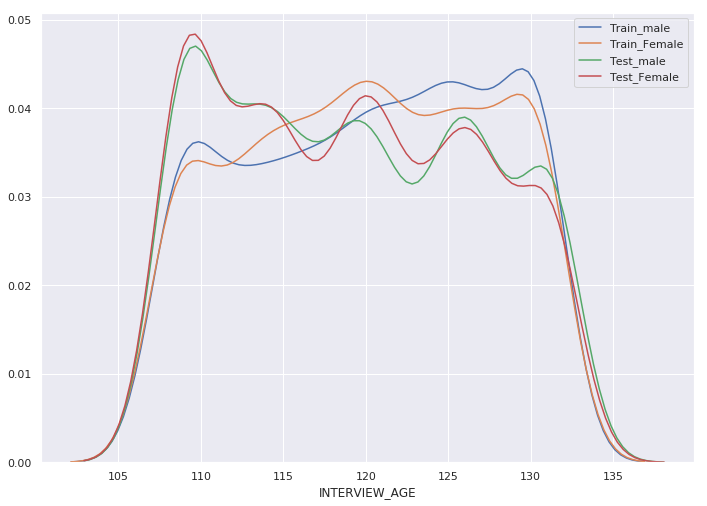

In [17]:
sns.distplot(all_data[(all_data.samplename=='Train') & (all_data.sex_bin==0)]["INTERVIEW_AGE"],\
             hist=False,label='Train_male') 
sns.distplot(all_data[(all_data.samplename=='Train') & (all_data.sex_bin==1)]["INTERVIEW_AGE"],\
             hist=False,label='Train_Female') 
sns.distplot(all_data[(all_data.samplename=='Test') & (all_data.sex_bin==0)]["INTERVIEW_AGE"],\
             hist=False,label='Test_male') 
sns.distplot(all_data[(all_data.samplename=='Test') & (all_data.sex_bin==1)]["INTERVIEW_AGE"],\
             hist=False,label='Test_Female') 


### ^^^  Female vs Male distribution is normal per age group

----
### Checking  if volume data is significantly different for extreme left and right  groups (due to difference in train and test groups)

In [18]:
all_data['age_bin']=pd.qcut(all_data['INTERVIEW_AGE'], 5, labels=list(range(0,5)))
age = all_data['INTERVIEW_AGE']
age_bin_cuts = [min(age),age.quantile(0.20),age.quantile(0.40),\
             age.quantile(0.60),age.quantile(0.80),max(age)]
print(age_bin_cuts)
print(all_data['age_bin'].value_counts())

[107, 112.0, 117.0, 122.0, 127.0, 133]
0    1750
2    1656
4    1522
3    1464
1    1399
Name: age_bin, dtype: int64


In [19]:

age_col_sign = []
age_col_high = []
age_col_no = []

for column in all_data[all_data.columns.difference(['SUBJECTKEY', 'INTERVIEW_AGE','STUDY_COHORT_NAME'\
                                                   ,'sex_bin','age_bin','samplename'])]:
    a = ks_2samp(all_data[all_data.age_bin==0][column],all_data[all_data.age_bin==4][column])
    b = round((1-a.pvalue),3)
    diff_type = ['Not','Highly','SIGNIFICANTLY']
    if b>0.95:
        diff = diff_type[2]
        age_col_sign.extend([column])
    elif b>0.90:
        diff = diff_type[1]
        age_col_sign.extend([column])
    else:
        diff = diff_type[0]
        age_col_sign.extend([column])
    print("Column: ",column," > are ",diff," different in youngest and oldest age groups.")

Column:  SRI24AMYGDALALGM  > are  Not  different in youngest and oldest age groups.
Column:  SRI24AMYGDALARGM  > are  SIGNIFICANTLY  different in youngest and oldest age groups.
Column:  SRI24ANGULARLGM  > are  SIGNIFICANTLY  different in youngest and oldest age groups.
Column:  SRI24ANGULARRGM  > are  SIGNIFICANTLY  different in youngest and oldest age groups.
Column:  SRI24CALCARINELGM  > are  SIGNIFICANTLY  different in youngest and oldest age groups.
Column:  SRI24CALCARINERGM  > are  SIGNIFICANTLY  different in youngest and oldest age groups.
Column:  SRI24CAUDATELGM  > are  Not  different in youngest and oldest age groups.
Column:  SRI24CAUDATERGM  > are  SIGNIFICANTLY  different in youngest and oldest age groups.
Column:  SRI24CBLMHEMIWHTLWM  > are  SIGNIFICANTLY  different in youngest and oldest age groups.
Column:  SRI24CBLMHEMIWHTRWM  > are  SIGNIFICANTLY  different in youngest and oldest age groups.
Column:  SRI24CEREBELUM10LVOLUME  > are  SIGNIFICANTLY  different in younges

In [20]:
len(age_col_sign) ## these many column differ significantly in youngest and oldest age groups

122